In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from pathlib import Path
import warnings

In [92]:
# load original data
file_path_orginal = 'data/all_organisms_filtered_without_M.musculus_KIDNEY.parquet'
df_all_organisms = pd.read_parquet(file_path_orginal, engine='fastparquet')

In [93]:
df_all_organisms

,dataset_id,dataset_name,dataset_description,organism_id,organism_name,sample_organ,is_integrated,quality_score,coverage,publication_link,...,UniprotEntryName,UniprotAccession,ProteinName,GeneSymbol,Sequence,uniprot_status,nog_id,abundance,EnsemblTranscript,EnsemblGene
0,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,TDXH2_PICTO,Q6L140,Peroxiredoxin 2 (EC 1.11.1.24) (Thioredoxin-de...,['PTO0727'],MPVYLGKRAPDFTANTTRGVISLSDYKNKWVLLFSHPADFTPICTT...,available,NOG000073,55427.0,None,None
1,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6L1T7_PICTO,Q6L1T7,Superoxide dismutase (EC 1.15.1.1),"['PTO0480', 'SAMN02745355_0518']",MAETWEVKEKLKPRGLDGISDQQIDYHFDFHYKGYVTKLNEIWSKL...,available,NOG000141,51587.0,None,None
2,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,ALBA_PICTO,Q6KZR7,DNA/RNA-binding protein Alba,"['albA', 'PTO1200']",MAEENVIFVGKKPTMNYVLAIVTQFNNNSTSRIVIKARGKAISKAV...,available,NOG000930,30084.0,None,None
3,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6KZS2_PICTO,Q6KZS2,Thermosome subunit,['PTO1195'],MIGGQPIFILKEGTKRESGRDAMQDNIEAAKAIATSIRSTLGPRGM...,available,NOG000197,28530.0,None,None
4,81549873,"P.torridus DSM 9790 - Whole organism, SC (Muel...",abundance based on Spectral counting,263820,P.torridus DSM 9790,WHOLE_ORGANISM,False,9.2,50.0,http://www.ncbi.nlm.nih.gov/pubmed/32555458,...,Q6L132_PICTO,Q6L132,Thermosome subunit,['PTO0735'],MITGQTPILILKEGTERQQGKNAQKNNIEAAKAIADAVRTTLGPKG...,available,NOG000173,28087.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799446,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q727T4_DESVH,Q727T4,Response regulator,['DVU_2770'],MRFLIVEDDFTSRKFLQNMLAPFGECDIAVNGVEAVEAFKTALDSS...,available,NOG003794,76.3,None,None
4799447,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72EU1_DESVH,Q72EU1,isocitrate dehydrogenase (NADP(+)) (EC 1.1.1.42),"['icd', 'DVU_0477']",MRKTVYWIEGDGIGPEVWKAARPVIDAAVEKSYGDSRSIEWKELLA...,available,NOG001026,76.3,None,None
4799448,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72E63_DESVH,Q72E63,"Branched-chain amino acid ABC transporter, ATP...",['DVU_0716'],MFLELRNLHVKYGNVEALHGIDIRVDEGEIVTILGANGAGKTTTLM...,available,NOG010105,76.3,None,None
4799449,253694661,"D.vulgaris - Whole organism, Lactose-stationar...",abundance based on MAPPED_BY_AUTHORS,882,D.vulgaris,WHOLE_ORGANISM,False,0.1,23.0,http://eutils.ncbi.nlm.nih.gov/entrez/eutils/e...,...,Q72FD5_DESVH,Q72FD5,Sulfate permease family protein,['DVU_0279'],MAIPSGATGKEPFLPRTLTVLREGYDGGTFFKDLAAGLTVGIVALP...,available,NOG011787,76.3,None,None


In [94]:
df_mouse = df_all_organisms[df_all_organisms['organism_name'] == 'M.musculus']

In [95]:
df_mouse

,dataset_id,dataset_name,dataset_description,organism_id,organism_name,sample_organ,is_integrated,quality_score,coverage,publication_link,...,UniprotEntryName,UniprotAccession,ProteinName,GeneSymbol,Sequence,uniprot_status,nog_id,abundance,EnsemblTranscript,EnsemblGene
221432,1458147558,"M.musculus - Brain, Protein peptide count (Kis...",abundance based on Protein peptide count,10090,M.musculus,BRAIN,False,0.7,8.0,http://www.ncbi.nlm.nih.gov/pubmed/16615898,...,TBA4A_MOUSE,P68368,Tubulin alpha-4A chain (EC 3.6.5.-) (Alpha-tub...,"['Tuba4a', 'Tuba4']",MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGD...,available,NOG047599,56899.000,ENSMUST00000186213,ENSMUSG00000026202
221433,1458147558,"M.musculus - Brain, Protein peptide count (Kis...",abundance based on Protein peptide count,10090,M.musculus,BRAIN,False,0.7,8.0,http://www.ncbi.nlm.nih.gov/pubmed/16615898,...,HSP7C_MOUSE,P63017,Heat shock cognate 71 kDa protein (EC 3.6.4.10...,"['Hspa8', 'Hsc70', 'Hsc73']",MSKGPAVGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTD...,available,NOG047319,39185.000,ENSMUST00000015800,ENSMUSG00000015656
221434,1458147558,"M.musculus - Brain, Protein peptide count (Kis...",abundance based on Protein peptide count,10090,M.musculus,BRAIN,False,0.7,8.0,http://www.ncbi.nlm.nih.gov/pubmed/16615898,...,TBB4B_MOUSE,P68372,Tubulin beta-4B chain (Tubulin beta-2C chain),"['Tubb4b', 'Tubb2c']",MREIVHLQAGQCGNQIGAKFWEVISDEHGIDPTGTYHGDSDLQLER...,available,NOG059185,25608.000,ENSMUST00000043584,ENSMUSG00000036752
221435,1458147558,"M.musculus - Brain, Protein peptide count (Kis...",abundance based on Protein peptide count,10090,M.musculus,BRAIN,False,0.7,8.0,http://www.ncbi.nlm.nih.gov/pubmed/16615898,...,ATPB_MOUSE,P56480,ATP synthase F(1) complex catalytic subunit be...,"['Atp5f1b', 'Atp5b']",MLSLVGRVASASASGALRGLSPSAALPQAQLLLRAAPAGVHPARDY...,available,NOG045504,24757.000,ENSMUST00000026459,ENSMUSG00000025393
221436,1458147558,"M.musculus - Brain, Protein peptide count (Kis...",abundance based on Protein peptide count,10090,M.musculus,BRAIN,False,0.7,8.0,http://www.ncbi.nlm.nih.gov/pubmed/16615898,...,DPYL2_MOUSE,O08553,Dihydropyrimidinase-related protein 2 (DRP-2) ...,"['Dpysl2', 'Crmp2', 'Ulip2']",MSYQGKKNIPRITSDRLLIKGGKIVNDDQSFYADIYMEDGLIKQIG...,available,NOG047186,20070.000,ENSMUST00000022629,ENSMUSG00000022048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711291,473417818,"M.musculus - Plasma, SC (Peptideatlas,sep,2012)",abundance based on Spectral counting,10090,M.musculus,PLASMA,False,5.6,4.0,http://www.peptideatlas.org/,...,KT33B_MOUSE,Q61897,"Keratin, type I cuticular Ha3-II (Hair keratin...","['Krt33b', 'Hka3', 'Krt1-3']",MPYNCCLPAMSCRTSCSSRPCVPPSCHGCTLPGACNIPANVGNCNW...,available,NOG008950,0.143,ENSMUST00000073890,ENSMUSG00000057723
711292,473417818,"M.musculus - Plasma, SC (Peptideatlas,sep,2012)",abundance based on Spectral counting,10090,M.musculus,PLASMA,False,5.6,4.0,http://www.peptideatlas.org/,...,E9PWQ3_MOUSE,E9PWQ3,Collagen alpha-3(VI) chain (von Willebrand fac...,['Col6a3'],MRKHRHLPLVAVFSLLLSGIATTHAQQHGDVKNGAAADIVFLVDSS...,available,None,0.141,ENSMUST00000056925,ENSMUSG00000048126
711293,473417818,"M.musculus - Plasma, SC (Peptideatlas,sep,2012)",abundance based on Spectral counting,10090,M.musculus,PLASMA,False,5.6,4.0,http://www.peptideatlas.org/,...,K1H2_MOUSE,Q62168,"Keratin, type I cuticular Ha2 (Hair keratin, t...","['Krt32', 'Hka2', 'Krt1-2', 'Krtha2']",MPSVCMPTTYRPASCLSKTYLSSSCQPSNRRPTGCISSSMGTYGLF...,available,NOG056090,0.119,ENSMUST00000107419,ENSMUSG00000046095
711294,473417818,"M.musculus - Plasma, SC (Peptideatlas,sep,2012)",abundance based on Spectral counting,10090,M.musculus,PLASMA,False,5.6,4.0,http://www.peptideatlas.org/,...,MYH11_MOUSE,O08638,Myosin-11 (Myosin heavy chain 11) (Myosin heav...,['Myh11'],MAQKGQLSDDEKFLFVDKNFMNSPMAQADWVAKKLVWVPSEKQGFE...,available,None,0.095,ENSMUST00000090287,ENSMUSG00000018830


In [96]:
df_mouse.columns

Index(['dataset_id', 'dataset_name', 'dataset_description', 'organism_id',
       'organism_name', 'sample_organ', 'is_integrated', 'quality_score',
       'coverage', 'publication_link', 'publication_year', 'original_filename',
       'string_external_id', 'EnsemblProteinID', 'mapped_from',
       'UniprotEntryName', 'UniprotAccession', 'ProteinName', 'GeneSymbol',
       'Sequence', 'uniprot_status', 'nog_id', 'abundance',
       'EnsemblTranscript', 'EnsemblGene'],
      dtype='object')

In [97]:
protein_id_columns = ['string_external_id', 'EnsemblProteinID','UniprotEntryName', 'UniprotAccession', 'ProteinName',  'Sequence']

for col in protein_id_columns:
    # count how many unique values are in each column
    unique_count = df_mouse[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")
    # count how many NaN values are in each column
    nan_count = df_mouse[col].isna().sum()
    print(f"Column '{col}' has {nan_count} NaN values.")

Column 'string_external_id' has 20309 unique values.
Column 'string_external_id' has 0 NaN values.
Column 'EnsemblProteinID' has 20309 unique values.
Column 'EnsemblProteinID' has 0 NaN values.
Column 'UniprotEntryName' has 19439 unique values.
Column 'UniprotEntryName' has 11460 NaN values.
Column 'UniprotAccession' has 19117 unique values.
Column 'UniprotAccession' has 11460 NaN values.
Column 'ProteinName' has 18080 unique values.
Column 'ProteinName' has 11460 NaN values.
Column 'Sequence' has 18927 unique values.
Column 'Sequence' has 18893 NaN values.


In [98]:
file_path_train_mouse = 'data/train_added_M.musculus_KIDNEY_data.csv'
df_train_mouse = pd.read_csv(file_path_train_mouse)

In [99]:
# merge the additional train mouse data with the mouse data
df_mouse_all = pd.concat([df_mouse, df_train_mouse], ignore_index=True, axis=0)

In [100]:
df_mouse_all.columns

Index(['dataset_id', 'dataset_name', 'dataset_description', 'organism_id',
       'organism_name', 'sample_organ', 'is_integrated', 'quality_score',
       'coverage', 'publication_link', 'publication_year', 'original_filename',
       'string_external_id', 'EnsemblProteinID', 'mapped_from',
       'UniprotEntryName', 'UniprotAccession', 'ProteinName', 'GeneSymbol',
       'Sequence', 'uniprot_status', 'nog_id', 'abundance',
       'EnsemblTranscript', 'EnsemblGene'],
      dtype='object')

In [101]:
# filter for 'is_integrated' == True
df_mouse_integrated = df_mouse_all[df_mouse_all['is_integrated'] == True]

In [102]:
# check if all the ('EnsemblProteinID', 'sample_organ') pairs are unique
is_unique = not df_mouse_integrated.duplicated(subset=['EnsemblProteinID', 'sample_organ']).any()

print("All pairs are unique" if is_unique else "There are duplicate pairs.")


All pairs are unique


In [103]:
# pivot the integrated dataframe to have 'EnsemblProteinID' as index,  'sample_organ' as columns, and 'abundance' as values
df_mouse_integrated_abundances = df_mouse_integrated.pivot_table(index='EnsemblProteinID', 
                                                            columns='sample_organ', 
                                                            values='abundance').reset_index()


In [104]:
# check how many missing values there are per column in df_mouse_integrated_abundances
missing_values = df_mouse_integrated_abundances.isna().mean()*100  # percentage of missing values
print("Missing values per column:")
print(missing_values)

Missing values per column:
sample_organ
EnsemblProteinID         0.000000
BRAIN                   44.244354
BROWN_ADIPOSE_TISSUE    69.192120
B_CELL                  89.219978
CEREBELLUM              44.473187
CEREBRAL_CORTEX         74.490100
HEART                   58.536464
KIDNEY                  74.559745
LIVER                   64.923888
LUNG                    61.859516
MUSCLE                  57.606208
PANCREAS                68.664809
PLASMA                  94.791563
PLATELET                80.668590
SPLEEN                  64.421451
WHOLE_ORGANISM           1.149139
dtype: float64


In [105]:
df_abund = df_mouse_integrated_abundances.set_index('EnsemblProteinID')

# Drop rows where KIDNEY is NaN, since we need it as the 
df_abund_train = df_abund.copy()
df_abund_train = df_abund_train.dropna(subset=['KIDNEY'])


# Define y as the KIDNEY column
y = df_abund_train['KIDNEY']

# Define X as all other organs (drop KIDNEY)
X = df_abund_train.drop(columns=['KIDNEY'])

In [106]:
missing_values_X = X.isna().mean()*100  # percentage of missing values
print("Missing values per column:")
print(missing_values_X)

# how many protein rows do we have left after dropping NaNs in KIDNEY?
print(f"Number of protein rows after dropping NaNs in KIDNEY: {len(df_abund)}")

Missing values per column:
sample_organ
BRAIN                    8.330074
BROWN_ADIPOSE_TISSUE    17.774736
B_CELL                  68.987094
CEREBELLUM              10.481032
CEREBRAL_CORTEX         34.493547
HEART                   10.676574
LIVER                   10.852562
LUNG                    10.715682
MUSCLE                  16.425499
PANCREAS                19.104419
PLASMA                  87.231130
PLATELET                50.547517
SPLEEN                  14.528745
WHOLE_ORGANISM           0.117325
dtype: float64
Number of protein rows after dropping NaNs in KIDNEY: 20102


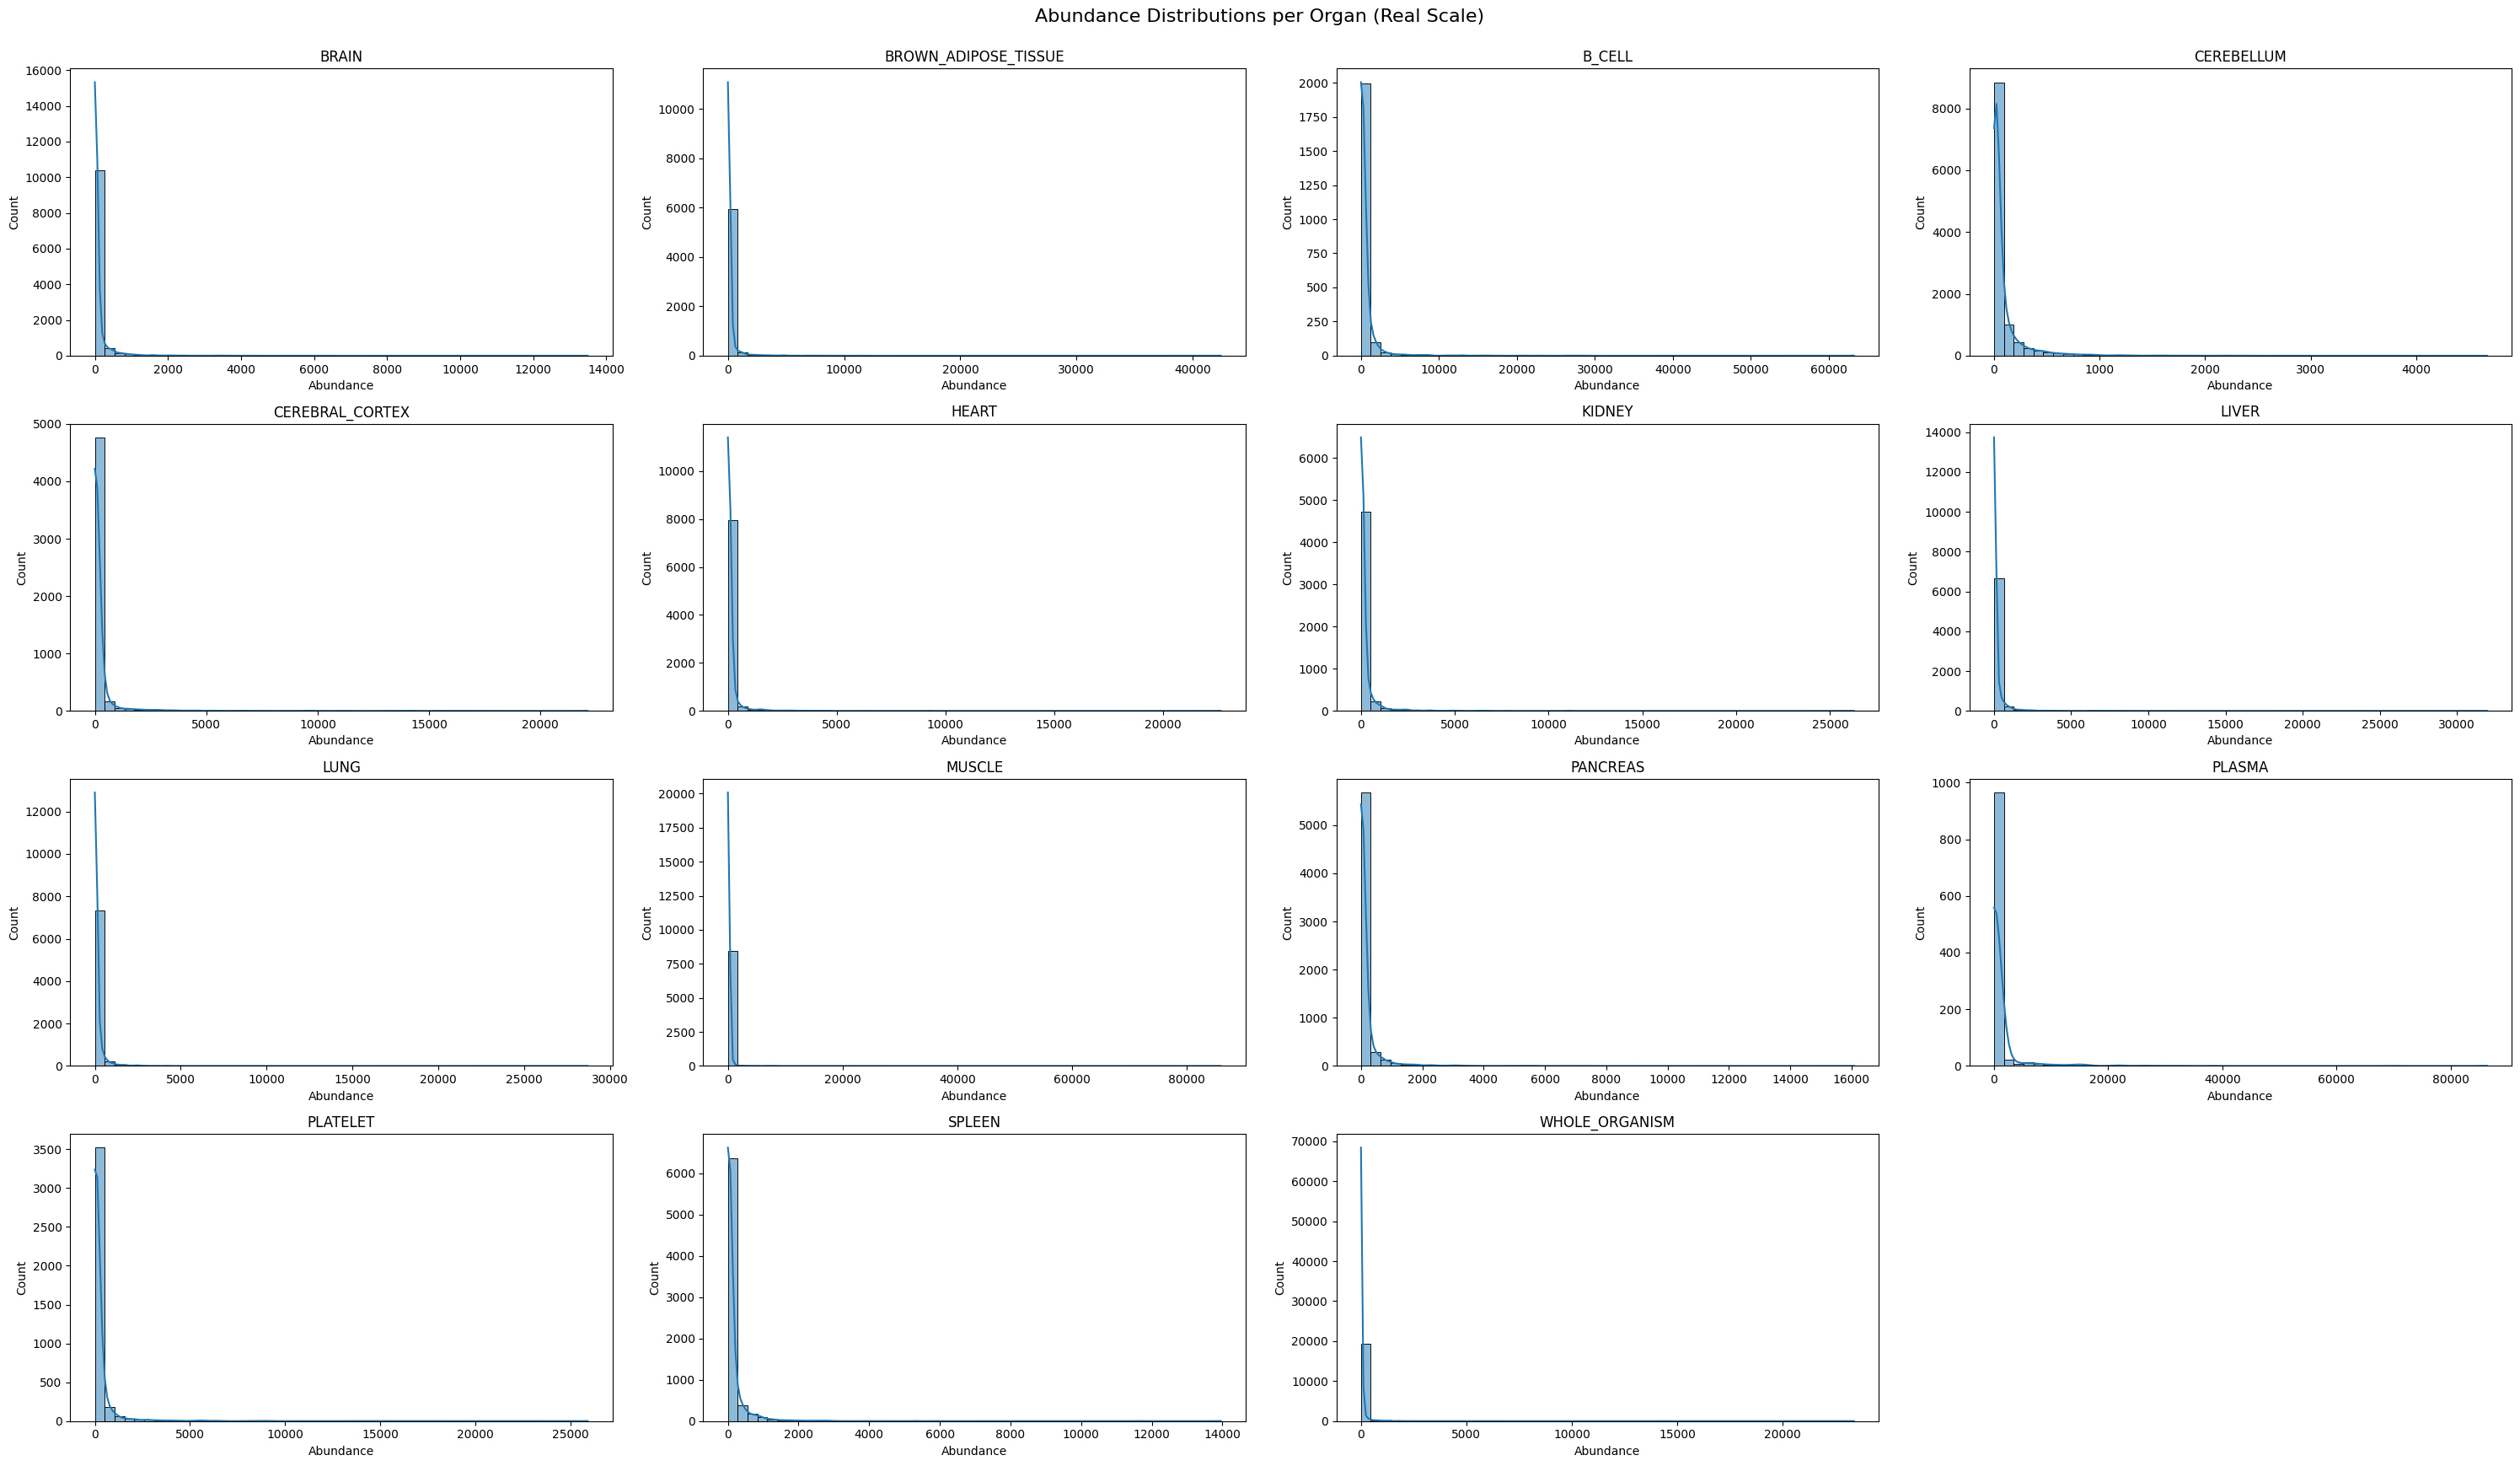

In [107]:
# plot the abundance distributions for each organ


organs = df_mouse_integrated_abundances.columns[1:]  # exclude 'EnsemblProteinID'

plt.figure(figsize=(30, 17))
for i, organ in enumerate(organs, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_mouse_integrated_abundances[organ].dropna(), bins=50, kde=True)
    plt.title(organ)
    plt.xlabel('Abundance')
    plt.ylabel('Count')
plt.tight_layout()
plt.suptitle("Abundance Distributions per Organ (Real Scale)", y=1.02, fontsize=16)
plt.show()


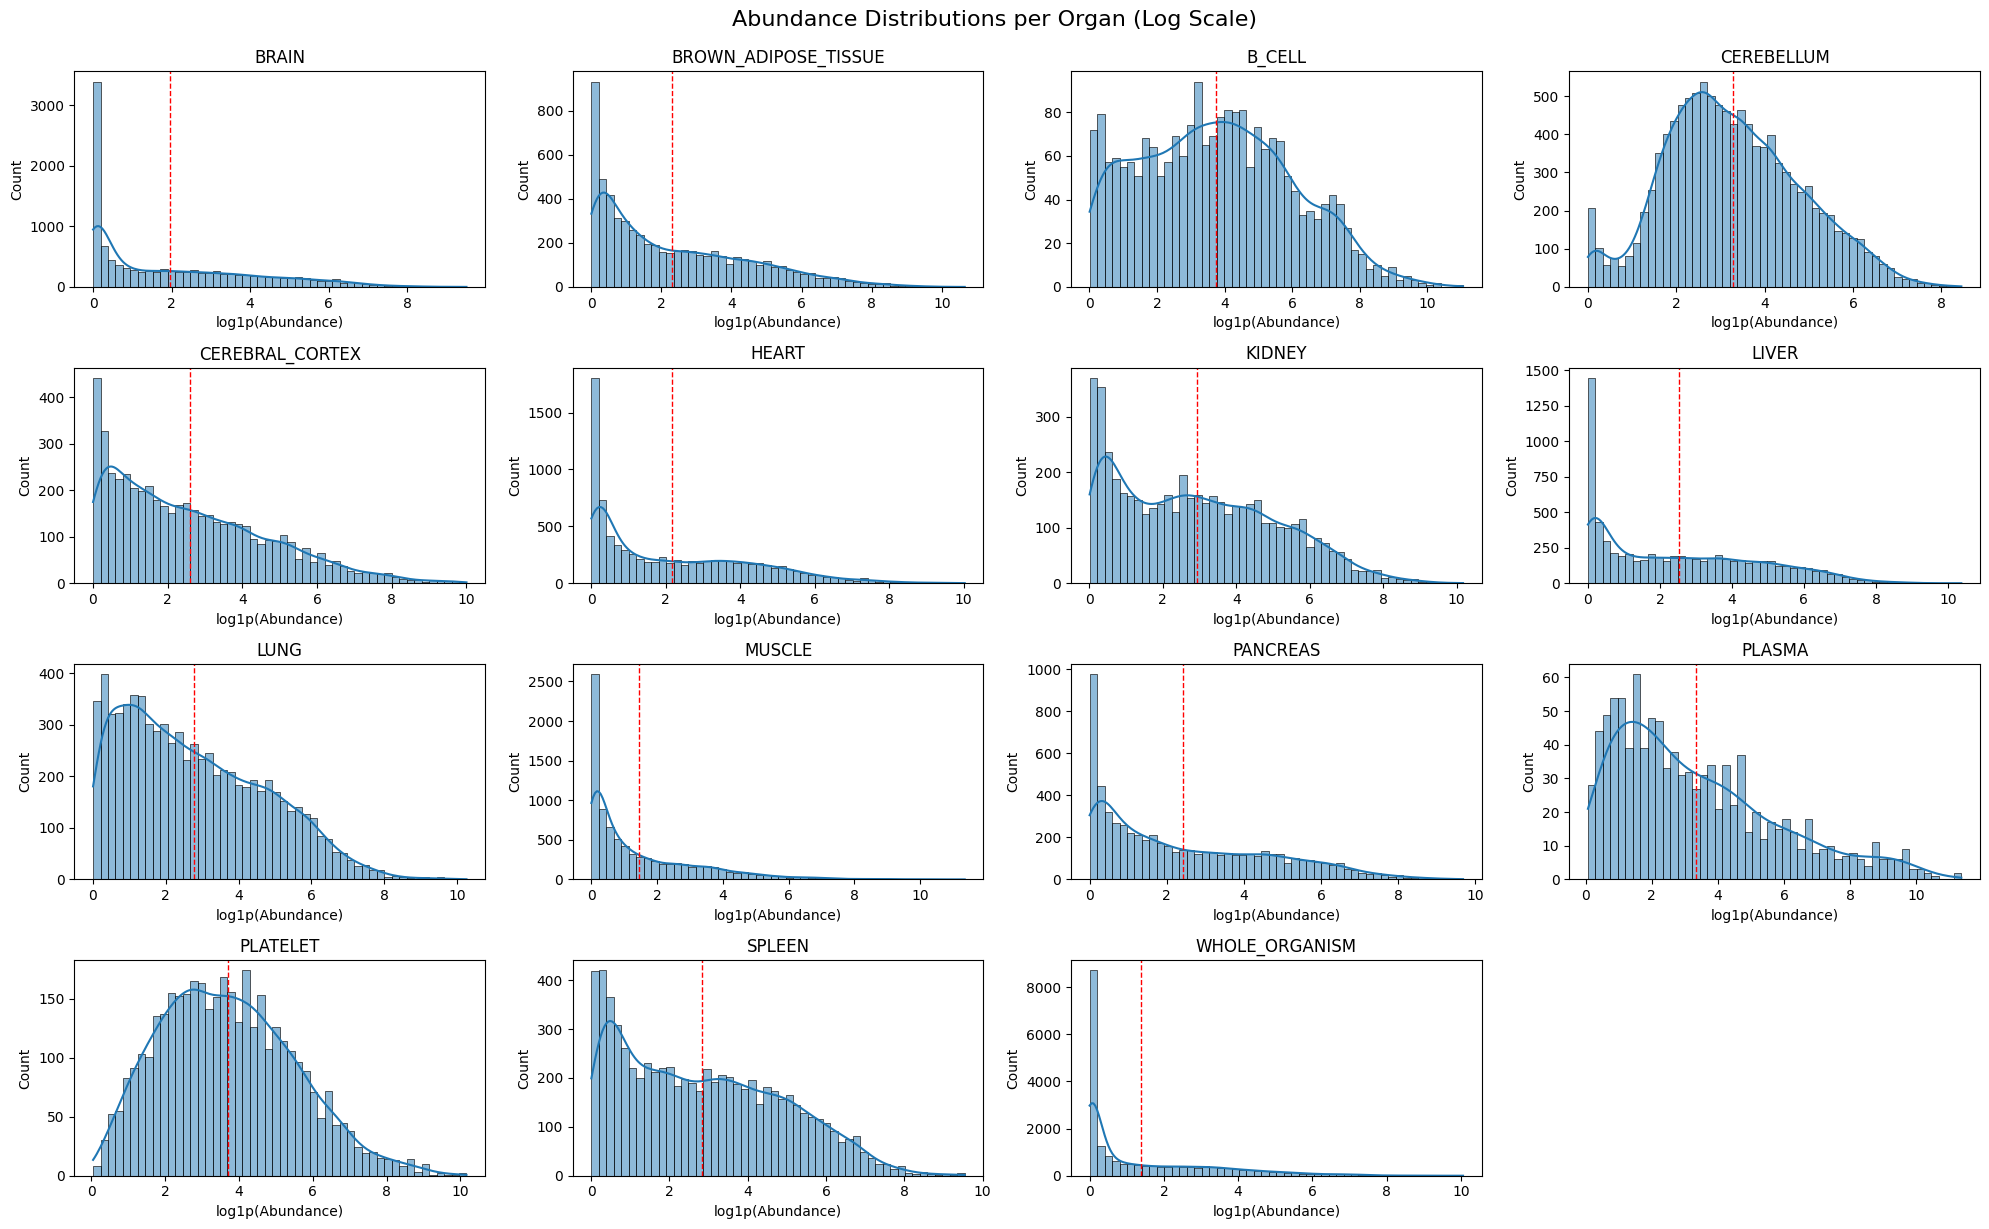

In [108]:
# plot the abundance distributions for each organ, log transformed

plt.figure(figsize=(20, 12))
for i, organ in enumerate(organs, 1):
    plt.subplot(4, 4, i)
    data = np.log1p(df_mouse_integrated_abundances[organ].dropna())
    sns.histplot(data, bins=50, kde=True)
    plt.title(organ)
    # Add vertical line at mean
    mean_val = data.mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1)
    plt.xlabel('log1p(Abundance)')
    plt.ylabel('Count')
plt.tight_layout()
plt.suptitle("Abundance Distributions per Organ (Log Scale)", y=1.02, fontsize=16)
plt.show()


In [109]:
X_filled = X.copy()
X_filled = X_filled.fillna(X_filled.mean())

In [110]:
# Log-transform after imputing
X_log = np.log1p(X_filled)
y_log = np.log1p(y)

In [111]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

# Define and train the XGBoost model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

# print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

Mean Squared Error: 1.5242
R^2 Score: 0.6671
Spearman Correlation: 0.7825


In [112]:
# load the test data
file_path_test_mouse = 'data/test2_masked_dropped_M.musculus_KIDNEY_data.csv'
test_data = pd.read_csv(file_path_test_mouse)

In [113]:
test_data.columns

Index(['organism_id', 'organism_name', 'sample_organ', 'is_integrated',
       'EnsemblProteinID', 'UniprotEntryName', 'UniprotAccession',
       'ProteinName', 'GeneSymbol', 'Sequence', 'nog_id', 'abundance',
       'EnsemblTranscript', 'EnsemblGene'],
      dtype='object')

In [115]:
test_ids = test_data['EnsemblProteinID'].unique()
# Index: string_external_id or EnsemblProteinID
# Columns: organ names
X_test_raw = df_abund.loc[df_abund.index.intersection(test_ids)]


In [ ]:
X_test_features = X_test_raw.drop(columns='KIDNEY', errors='ignore')

# Handle missing values
X_test_filled = X_test_features.fillna(X_filled.mean())  # use same fill strategy as training

# Log-transform
X_test_log = np.log1p(X_test_filled)

# Predict
y_pred_log = model.predict(X_test_log)
y_pred = np.expm1(y_pred_log)  # if model trained on log values

# Make a DataFrame with predictions
df_test_predictions = pd.DataFrame({
    'EnsemblProteinID': X_test_log.index,
    'KIDNEY': y_pred
}).set_index('EnsemblProteinID')
# Save predictions to a CSV file
output_file_path = 'data/test_predictions_mouse_KIDNEY.csv'
# df_test_predictions.to_csv(output_file_path)